Build a regression model.


#### Let's take a look at the relationship between features with a heatmap


In [1]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# Define the path to the CSV file
csv_file_path = '../data/joined.csv'

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Creating heatmap data
df_heatmap = df[['usage', 'total_bikes', 'poi_distance']].copy()


In [3]:
# Define the features (X) and target (y)
X = df_heatmap[['total_bikes', 'poi_distance']]
y = df_heatmap['usage']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [4]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


Mean Squared Error: 0.10430008876730193
R-squared: -0.19739739051447214


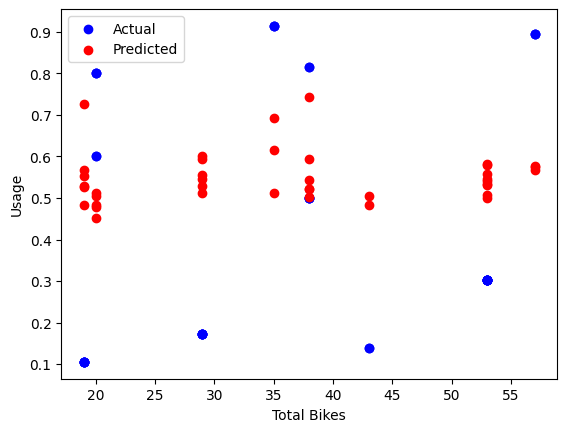

In [5]:
# Calculate mean squared error and R-squared (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the regression line
plt.scatter(X_test['total_bikes'], y_test, color='blue', label='Actual')
plt.scatter(X_test['total_bikes'], y_pred, color='red', label='Predicted')
plt.xlabel('Total Bikes')
plt.ylabel('Usage')
plt.legend()
plt.show()


Based on the results:

The Mean Squared Error (MSE) is about 0.0.1043
. MSE is a way to measure how close the predicted values are to the actual values. In simpler terms, a lower MSE is better. In this case, the model has an MSE of 0.1043; which would be considered good.

However, The R-squared (R2) value is approximately -0.1973 refering to a bad fit for the data.


In [6]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MSE and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 0.0064486311962300025
Random Forest R-squared: 0.9259677124150566


The results for the Random Forest Regression model are as follows:

Mean Squared Error (MSE): Approximately 0.0064
R-squared (R2): Approximately - 0.925

This value is significantly lower than the MSE from the previous Linear Regression model. A lower MSE indicates that the Random Forest model's predictions are, on average, closer to the actual values. The MSE of approximately 0.0064 suggests that this model is a good fit for the data.

The R-squared value is a measure of how well the model's predictions match the actual data. An R-squared of 0.9259 (or about 92.59%) is quite high, which means that approximately 92.59% of the variance in the dependent variable (usage) is predictable from the independent variables (total_bikes, poi_distance) in the model.

This is a significant improvement over the Linear Regression model, which had a negative R-squared value. It indicates that the Random Forest model captures the relationships and patterns in the data much more effectively.
In summary, the Random Forest Regression model shows both a low Mean Squared Error and a high R-squared value, indicating that it is a very effective model for predicting the target variable with the given features. It seems to capture the underlying relationships in the data much better than the Linear Regression model previously used.


In [7]:
# Load data
df_joined = pd.read_csv('../data/joined.csv', index_col=None)

# Creating heatmap data
df_heatmap = df_joined[['usage', 'total_bikes', 'poi_distance']].copy()


In [8]:
# Calculate 'usage_percentage'
df['usage_percentage'] = df['usage'] / df['total_bikes']

# Define thresholds and labels for classes
thresholds = [0, 0.2, 0.5, 1.0]
labels = ['Low Usage', 'Moderate Usage', 'High Usage']

# Create the new categorical target variable 'usage_category'
df['usage_category'] = pd.cut(
    df['usage_percentage'], bins=thresholds, labels=labels)

# Drop 'usage_percentage' if no longer need it
df.drop('usage_percentage', axis=1, inplace=True)


In [9]:
X = df[['total_bikes', 'poi_distance']]
y = df['usage_category']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:
classifier = LogisticRegression()


In [12]:
missing_values = df.isna().sum()
print(missing_values)


station           0
usage             0
total_bikes       0
poi_name          0
poi_distance      0
poi_address       0
usage_category    0
dtype: int64


In [13]:
df.dropna(inplace=True)


In [14]:
# Calculate 'usage_percentage'
df['usage_percentage'] = df['usage'] / df['total_bikes']


In [15]:
# Define thresholds and labels for classes
thresholds = [0, 0.3, 0.6, 1.0]  # Adjust the thresholds as needed
labels = ['Low Usage', 'Moderate Usage', 'High Usage']


In [16]:
# Create the new categorical target variable 'usage_category'
df['usage_category'] = pd.cut(
    df['usage_percentage'], bins=thresholds, labels=labels)


In [17]:
# Define thresholds and labels for classes
thresholds = [0, 0.3, 0.6, 1.0]  # Adjust the thresholds as needed
labels = ['Low Usage', 'Moderate Usage', 'High Usage']

# Create the new categorical target variable 'usage_category'
df['usage_category'] = pd.cut(
    df['usage_percentage'], bins=thresholds, labels=labels)


In [18]:
X = df[['total_bikes', 'poi_distance']]
y = df['usage_category']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [20]:
classifier = LogisticRegression()


In [21]:
df_joined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       200 non-null    object 
 1   usage         200 non-null    float64
 2   total_bikes   200 non-null    int64  
 3   poi_name      200 non-null    object 
 4   poi_distance  200 non-null    float64
 5   poi_address   200 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


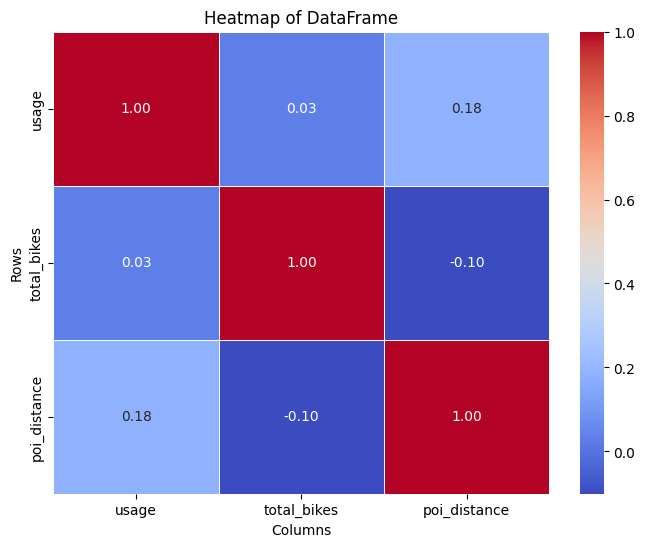

In [22]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm",
            annot=True, fmt=".2f", linewidths=.5)

# Add labels and title
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Heatmap of DataFrame")

# Show the plot
plt.show()


In [23]:
X = df_joined[['usage', 'poi_distance']]
y = df_joined['total_bikes']


Provide model output and an interpretation of the results.


In [24]:
# Assuming X and y are already defined
X = sm.add_constant(X)  # Adding a constant term to the predictors
est = sm.OLS(y, X).fit()  # Fitting an OLS model

# Call summary on est
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:            total_bikes   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.260
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.286
Time:                        01:34:11   Log-Likelihood:                -791.39
No. Observations:                 200   AIC:                             1589.
Df Residuals:                     197   BIC:                             1599.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.7162      1.983     17.507   

The model is trying to predict the number of total bikes.
R-squared: 0.013. This value is very low, indicating that only 1.3% of the variance in total_bikes is explained by the model. This suggests the model is not very effective at predicting total_bikes.

Coefficients:
const: The constant (intercept) is 34.7162. This is the model's prediction for total_bikes when both usage and poi_distance are 0.
usage: The coefficient is 2.1381, but its p-value is 0.478, which is not statistically significant.
poi_distance: The coefficient is -0.0053, with a p-value of 0.129. It's closer to being significant, but still above the common alpha level of 0.05.

In summary, this OLS regression model does not seem to be a good fit for predicting total_bikes based on usage and poi_distance. The low R-squared values, high p-values for the coefficients, and diagnostic tests suggest that the model may not be capturing the necessary predictive power from the features, and there could be issues with the data such as multicollinearity or non-normality of residuals.


# Stretch


How can you turn the regression model into a classification model?


Having more time.

To turn a regression model into a classification model, the nature of the prediction task changes. In regression, the goal is to predict a continuous numeric value, while in classification, the goal is to predict a categorical label or class.

Identify Categories: Decide what categories or groups to predict. Transform the continuous numeric output from the regression into distinct categories. This might mean setting boundaries or defining groups based on the problem.

Assign Labels: Give each data point a label based on its category. Each data point should have a category label assigned to it.

Pick a Classification Method: Choose a suitable classification technique for the task. Common methods include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines, and Neural Networks.
